In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file1 = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/kuivis_32_current_5_24.nc'
file2 = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/kuivis_32_pristine_5_24.nc'

results1 = xr.open_dataset(file1)
firedata1 = results1[['forcing_wind_speed', 'forcing_air_temperature', 'forcing_relative_humidity', 
                    'bucket_psi_root']].copy()
results1.close()
firedata1 = firedata1.sel(time=firedata1.time.dt.month.isin([5, 6, 7, 8, 9])).copy()

In [3]:
results2 = xr.open_dataset(file2)
firedata2 = results2[['forcing_wind_speed', 'forcing_air_temperature', 'forcing_relative_humidity', 
                    'bucket_psi_root']].copy()
results2.close()
firedata2 = firedata2.sel(time=firedata2.time.dt.month.isin([5, 6, 7, 8, 9])).copy()

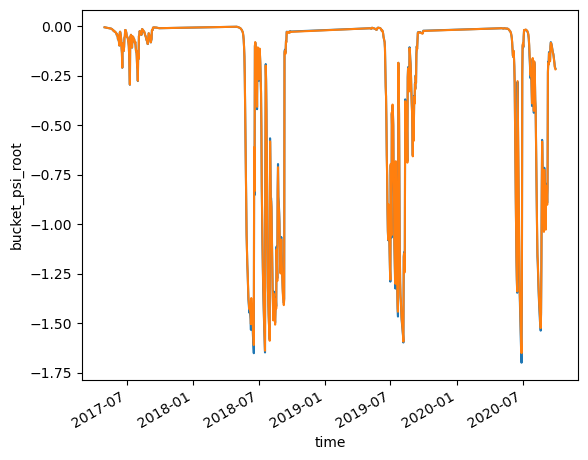

In [4]:
firedata1['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['lat','lon']).plot()
firedata2['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['lat','lon']).plot()
#firedata1['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).quantile(0.1, dim=['lat','lon']).plot()
#firedata2['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).quantile(0.1, dim=['lat','lon']).plot()

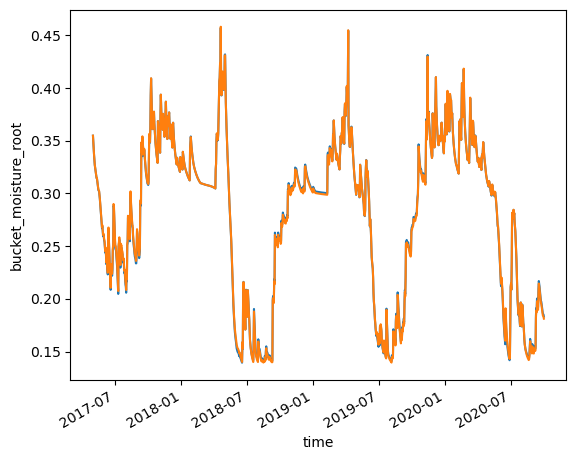

In [4]:
firedata1['bucket_moisture_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['lat','lon']).plot()
firedata2['bucket_moisture_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['lat','lon']).plot()
#firedata2['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).min(dim=['lat','lon']).plot()

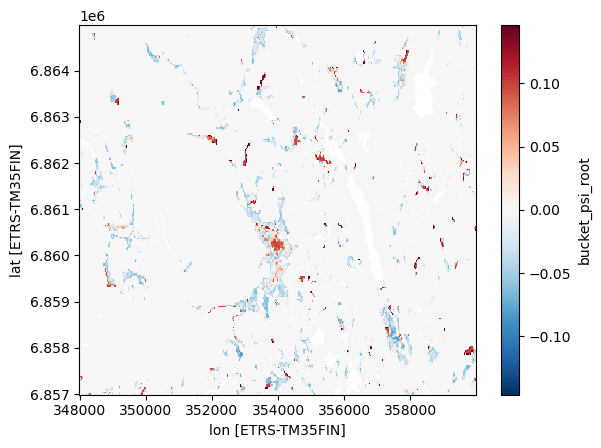

In [5]:
(firedata1['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['time']) - 
 firedata2['bucket_psi_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['time'])).plot()

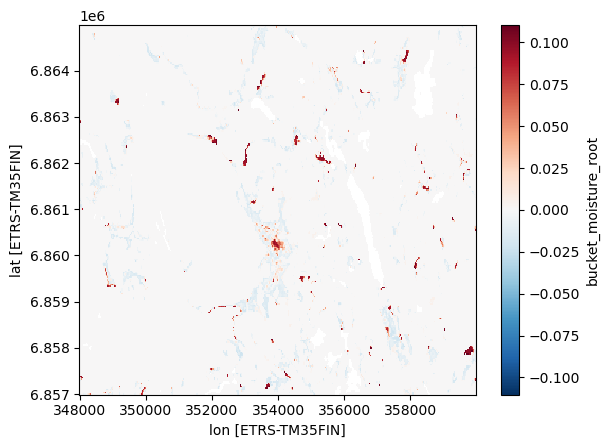

In [6]:
(firedata1['bucket_moisture_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['time']) - 
 firedata2['bucket_moisture_root'].sel(time=slice('2017-05-01', '2020-10-01')).mean(dim=['time'])).plot()

In [6]:
fp1 = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/FIRE_5_24/spafhy_current_for_fire_5_24.nc'
firedata1.to_netcdf(fp1, 'w')
firedata1.close()

fp2 = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/FIRE_5_24/spafhy_pristine_for_fire_5_24.nc'
firedata2.to_netcdf(fp2, 'w')
firedata2.close()